In [216]:
import numpy as np

from gtda.homology import VietorisRipsPersistence

import gudhi

from steenroder import *

## Generating non-orientable surfaces

We are going to consider different classical shapes: the real projective space and the Klein bottle.
The purpose of the second part of the tutorial is to define shapes via a distance matrix. We also add noise to the distance matrix: the main reason is not to have overlapping points in the persistence diagram.

Each of the topological spaces we are going to encounter will be sampled discretely. Afterwards, the Vietoris–Rips technique will be applied to the surface and the persistent homology groups will be computed.

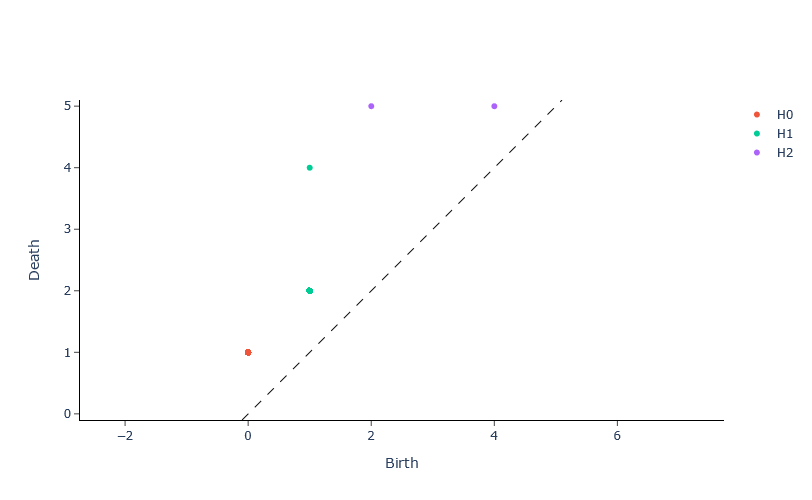

In [218]:
# Compute the adjacency matrix of the grid points, with boundaries identified as in the real projective space
from sklearn.utils.graph_shortest_path import graph_shortest_path

# This functions prepares the grid matrix with boundary identification
def make_rp2_matrix(rows, cols):
    n = rows * cols
    M = np.zeros((n, n))
    for r in range(rows):
        for c in range(cols):
            i = r * cols + c
            # Two inner diagonals
            if c > 0: M[i - 1, i] = M[i, i - 1] = 1
            # Two outer diagonals
            if r > 0: M[i - cols, i] = M[i,i - cols] = 1
            # vertical twisted boundary identification
            if c == 0: M[n-i-1, i] = M[i, n - i - 1] = 1
            # horizontal twisted boundary identification
            if r == 0: M[n - i - 1, i] = M[i, n - i - 1] = 1
                
    return M

M = make_rp2_matrix(10, 10)

# Compute the distance matrix of the points over the Klein bottle

rp2 = graph_shortest_path(M)

VietorisRipsPersistence(metric='precomputed', homology_dimensions=[0, 1, 2]).fit_transform_plot([rp2]);

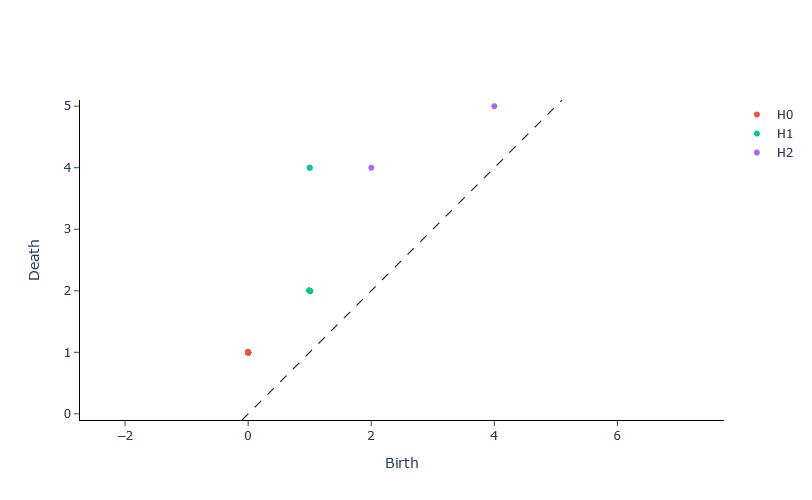

In [198]:
# This functions prepares the grid matrix with boundary identification
def make_klein_matrix(rows, cols):
    n = rows * cols
    M = np.zeros((n, n))
    for r in range(rows):
        for c in range(cols):
            i = r * cols + c
            # Two inner diagonals
            if c > 0: M[i - 1, i] = M[i, i - 1] = 1
            # Two outer diagonals
            if r > 0: M[i - cols, i] = M[i, i - cols] = 1
            # vertical boundary identification
            if c == 0: M[i + cols - 1, i] = M[i, i + cols - 1] = 1
            # horizontal twisted boundary identification
            if r == 0: M[n - i - 1, i] = M[i, n - i - 1] = 1
                
    return M

M = make_klein_matrix(10, 10)

# computing the distance matrix of the points over the Klein bottle

klein = graph_shortest_path(M)

# Plot of the distance matrix
VietorisRipsPersistence(metric='precomputed', homology_dimensions=[0, 1, 2]).fit_transform_plot([klein]);

In [199]:
rips_complex_coll = gudhi.RipsComplex(distance_matrix=klein)
simplex_tree_coll = rips_complex_coll.create_simplex_tree(max_dimension=1)  # Only get the 1-skeleton this time

In [212]:
simplex_tree_coll.collapse_edges(nb_iterations=100)

In [213]:
filtration_coll = []
for s in simplex_tree_coll.get_filtration():
    filtration_coll.append(s)

print(f"Filtration with {len(filtration_coll)} simplices")

Filtration with 4121 simplices


In [214]:
simplex_tree_coll.expansion(2)

In [215]:
filtration_coll = []
for s in simplex_tree_coll.get_filtration():
    filtration_coll.append(s)

print(f"Filtration with {len(filtration_coll)} simplices")

Filtration with 91949 simplices


In [217]:
barcodes(1, [tuple(s[0]) for s in filtration_coll])[1]

[[], [], []]